Regresion Logistica

Importar las librerias necesarias

In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

Importar y cargar el DataSet

In [2]:
FileDs = r'C:\Users\jhean\OneDrive\Documentos\Tareas\Inteligencia artificial\DataSets\card_transdata.csv'
data = pd.read_csv(FileDs)
X = data.drop(columns=["fraud"]).values
y = data["fraud"].values

Verificacion de la carga de datos

In [ ]:
data

In [ ]:
#Dataframe con los datos limpios
column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]
data_clean = pd.DataFrame(X, columns=column_names)
data_clean

In [ ]:
print(y)

Generar graficas 2D

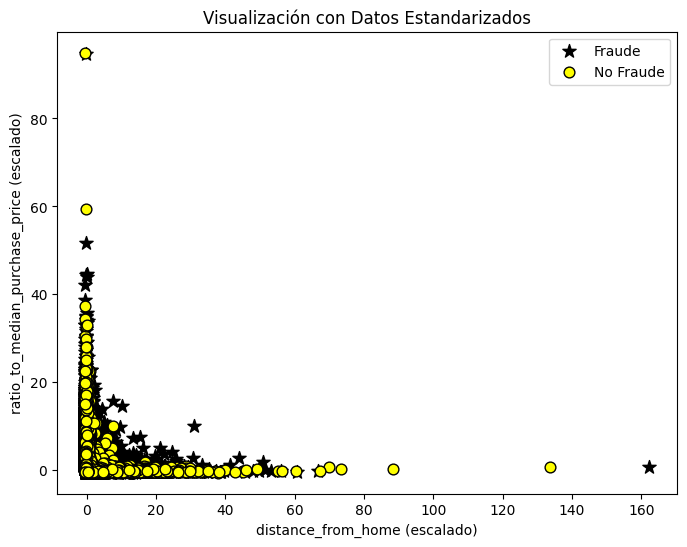

In [7]:
from sklearn.preprocessing import StandardScaler

# Ejemplo: Escalamos las variables numéricas (recordemos que son las 3 primeras columnas)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[:, 0:3] = scaler.fit_transform(X_scaled[:, 0:3])

# Ahora graficamos los datos
import matplotlib.pyplot as plt
pos = y == 1  # Fraude
neg = y == 0  # No Fraude

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[pos, 0], X_scaled[pos, 2], marker='*', c='k', s=100, label='Fraude')
plt.scatter(X_scaled[neg, 0], X_scaled[neg, 2], marker='o', c='yellow', edgecolors='k', s=60, label='No Fraude')
plt.xlabel("distance_from_home (escalado)")
plt.ylabel("ratio_to_median_purchase_price (escalado)")
plt.title("Visualización con Datos Estandarizados")
plt.legend()
plt.show()


Implementar la funcion Sigmoidea

In [8]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Funcion de costo, gradiente y entrenamiento del modelo

In [9]:
# Concatenando el Intercepto
m, n = X_scaled.shape
X_intercept = np.concatenate([np.ones((m, 1)), X_scaled], axis=1)

In [ ]:
# Descenso del gradiente
cost_history = []
def gradient_descent(X, y, theta, alpha, iteraciones):
    m = len(y)
    for i in range(iteraciones):
        z = np.dot(X, theta)
        h = sigmoid(z)
        error = h - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        # Mostramos el costo cada 100 iteraciones
        if i % 100 == 0:
            cost = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
            print(f"Iteración {i}, Costo: {cost}")
    print(f"Coeficiente de aprendizaje: {alpha}")
    return theta

# Llamada a la función
theta = np.zeros(X_intercept.shape[1])
alpha = 0.9
iteraciones = 3500
theta = gradient_descent(X_intercept, y, theta, alpha, iteraciones)
#costo 0.14558269565983714 0.2 3500
#costo 0.1417087235566412 0.3 3500
#costo 0.1394765901102144 0.4 3500
#costo 0.13697655205372444 0.6 3500
#costo 0.13620325583337134 0.7 3500
#costo 0.13560446562172135 0.8 3500
#costo 0.135198354525516 0.9 3500


Iteración 0, Costo: 0.6931471605599454
Iteración 100, Costo: 0.1778930524745185
Iteración 200, Costo: 0.16456495050791572
Iteración 300, Costo: 0.15778695611868232
Iteración 400, Costo: 0.15348210696890735
Iteración 500, Costo: 0.15044902473647048
Iteración 600, Costo: 0.14817669356814545
Iteración 700, Costo: 0.14640188828194697
Iteración 800, Costo: 0.14497255786219718
Iteración 900, Costo: 0.14379389887332591
Iteración 1000, Costo: 0.14280343292836684
Iteración 1100, Costo: 0.1419581852638575
Iteración 1200, Costo: 0.14122756041986875
Iteración 1300, Costo: 0.14058914540671294
Iteración 1400, Costo: 0.14002612012022092
Iteración 1500, Costo: 0.13952559742194376
Iteración 1600, Costo: 0.13907752435559947
Iteración 1700, Costo: 0.13867393438082218
Iteración 1800, Costo: 0.13830842603401494
Iteración 1900, Costo: 0.13797579159817216
Iteración 2000, Costo: 0.1376717475440184
Iteración 2100, Costo: 0.137392735472266
Iteración 2200, Costo: 0.13713577284383896
Iteración 2300, Costo: 0.1368

Aplicacion practica del modelo

In [20]:
# La función de predicción
def predict(X, theta):
    m_local = X.shape[0]
    #No olvidar concatenar el intercepto
    X_intercept_local = np.concatenate([np.ones((m_local, 1)), X], axis=1)
    proba = sigmoid(np.dot(X_intercept_local, theta))
    return (proba >= 0.5).astype(int)

# Crear un nuevo conjunto de datos para predecir
# Formato: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order]
new_data = np.array([[0.8766322564943629, 2.5036089266921437, 1.5169993152858177, 0, 0, 0, 0]])

# Escalar las características numéricas (solo las 3 primeras) de la misma manera que el conjunto de entrenamiento
scaler = StandardScaler()
new_data[:, 0:3] = scaler.fit_transform(new_data[:, 0:3])

# Realizar la predicción con el modelo entrenado
new_prediction = predict(new_data, theta)

# Mostrar el resultado
if new_prediction == 0:
    print("La transacción NO es un fraude.")
else:
    print("La transacción SÍ es un fraude.")

#print("Predicción de fraude para los nuevos datos (1 = fraude, 0 = no fraude):", new_prediction)

La transacción NO es un fraude.
